# Equalização de Histograma: Melhoria de Imagens de Baixa Qualidade

A equalização de histograma é uma técnica de processamento de imagens utilizada para melhorar o contraste de imagens, especialmente aquelas consideradas de baixa qualidade (com pouco contraste ou iluminação inadequada). O objetivo é redistribuir os níveis de intensidade dos pixels, tornando o histograma da imagem mais uniforme e, assim, realçando detalhes que estavam pouco visíveis.

Nesta atividade, vamos aplicar a equalização de histograma em três imagens diferentes, analisando os resultados antes e depois do processamento, e discutindo as vantagens e limitações dessa técnica.

In [81]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import cv2 as cv
from skimage import io


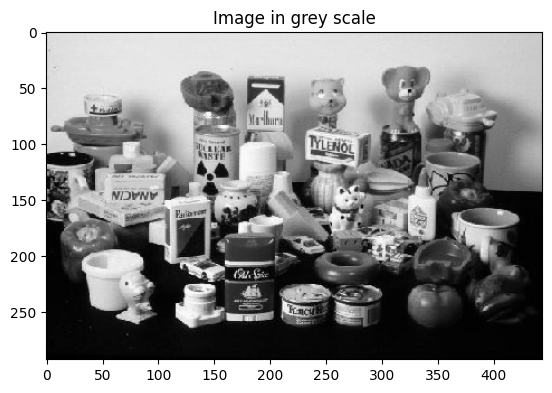

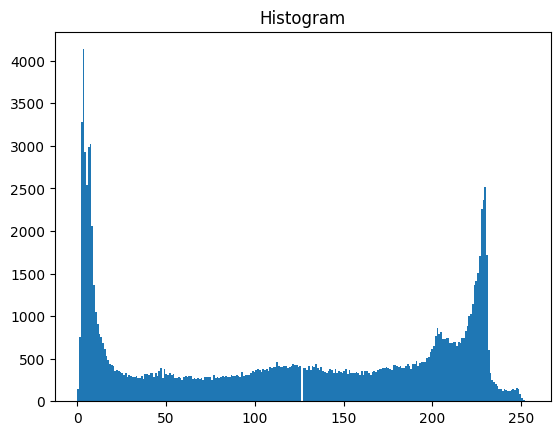

In [82]:
def changecolor(im):
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    return gray

def printimage(im,title):
  plt.imshow(im, cmap='gray', vmin=0, vmax=255)
  plt.title(title)
  return plt.show()

def printhistogram(im,title):
  plt.hist(im.ravel(), 256)
  plt.title(title)
  return plt.show()

url = "https://www.cs.columbia.edu/CAVE/software/softlib/gif/100objects.jpg"
image = io.imread(url)

gray = changecolor(image)
printimage(gray,"Image in grey scale")
printhistogram(gray,"Histogram")

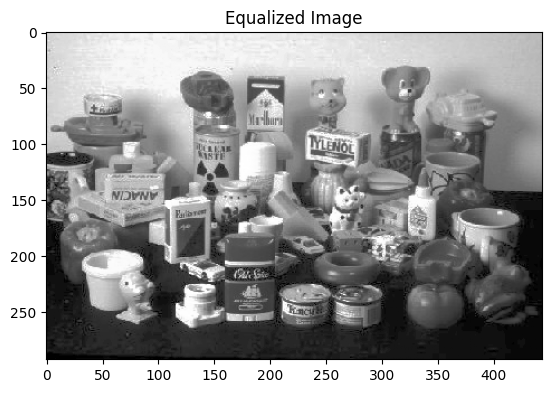

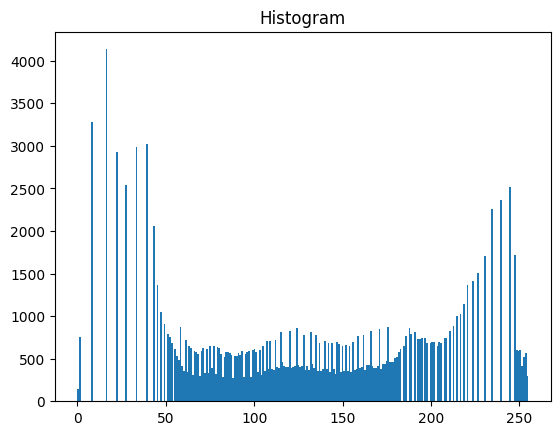

In [83]:
eq = cv2.equalizeHist(gray)
printimage(eq,"Equalized Image")
printhistogram(eq,"Histogram")

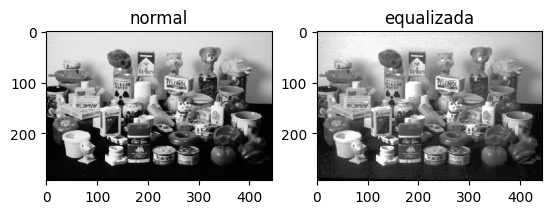

In [84]:
def comparision(img1,img2,title1,title2):
  plt.subplot(1,2,1)
  plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
  plt.title(title1)
  plt.subplot(1,2,2)
  plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
  plt.title(title2)
  return plt.show()

comparision(gray,eq,"normal","equalizada")

## Análise dos Resultados: Antes e Depois da Equalização

Ao comparar as imagens originais com as imagens após a equalização do histograma, é possível observar:

- **Melhoria do Contraste:** Detalhes que estavam pouco visíveis em regiões escuras ou claras tornam-se mais evidentes.
- **Distribuição dos Tons:** O histograma da imagem equalizada tende a ocupar uma faixa mais ampla de intensidades, tornando a imagem visualmente mais equilibrada.

### Vantagens da Equalização de Histograma
- Realce de detalhes em imagens de baixo contraste.
- Técnica simples e eficiente para melhorar a qualidade visual.
- Pode ser aplicada tanto em imagens em tons de cinza quanto coloridas (canal a canal).

### Limitações
- Pode introduzir artefatos ou exagerar o contraste em algumas regiões.
- Nem sempre é adequada para imagens já bem iluminadas ou com contraste adequado.
- Em imagens coloridas, a equalização separada dos canais pode alterar as cores originais.

**Conclusão:**
A equalização de histograma é uma ferramenta poderosa para melhorar imagens de baixa qualidade, mas deve ser usada com cautela, considerando as características da imagem e o objetivo da aplicação.

# Experimento: Equalização de Histograma em Três Imagens Diferentes

A seguir, cada membro do grupo processa uma imagem diferente, conforme solicitado. O fluxo inclui: 
- Seleção das imagens;
- Mudança da cor para escalas de cinza;
- Equalização dos tons da imagem;
- Comparação entre antes e depois da equalização;
- Demonstração do gráfico do histograma.

In [ ]:
img_url_list= ["https://g1.globo.com/VCnoG1/foto/0,,14342751-EX,00.jpg",
               "https://ichef.bbci.co.uk/images/ic/1200x675/p0f926p1.jpg",
               "https://guidetooilpainting.com/images/basics-contrast/5cast-shadow-low-contrast.jpg"]
for url in img_url_list:
  image = io.imread(url)
  gray = changecolor(image)
  eq = cv2.equalizeHist(gray)
  comparision(gray,eq,"normal","equalizada")

NameError: name 'io' is not defined